In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sn
import pingouin

measurements_folder = 'measurements/'
plot_folder = 'result_plots/'

In [11]:
rest = pd.read_csv(measurements_folder + 'rest_data', header = None, names = ['Call', 'Time'], index_col = ['Call'])
graph = pd.read_csv(measurements_folder + 'graphql_data', header = None, names = ['Call', 'Time'], index_col = ['Call'])
properties = pd.read_csv(measurements_folder + 'variable_counts', header = None, names = ['Call', 'PropertiesCount'], index_col = ['Call'])
plt.rcParams["figure.figsize"] = (20,10)

data = pd.DataFrame(rest.index.unique(), columns = ["Call"])
data = data.set_index('Call')
dataColumns = ['TValue', 'PValue', 'DiffMean', 'DiffLowerConfidence', 'DiffUpperConfidence', 'RESTMean', 'RESTStd', 'GraphMean', 'GraphStd', 'RESTLowerConfidence', 'RESTUpperConfidence', 'GraphLowerConfidence', 'GraphUpperConfidence', 'RestTimePerProperty', 'GraphTimePerProperty', 'TPerProperty', 'RESTPerPropertyLowerConfidence', 'RESTPerPropertyUpperConfidence', 'GraphPerPropertyLowerConfidence', 'GraphPerPropertyUpperConfidence']
data[dataColumns] = 0

for call in rest.index.unique():
    rest_calls = rest.loc[call]
    graph_calls = graph.loc[call]
    
    restmean = rest_calls.Time.mean()
    graphmean = graph_calls.Time.mean()

    reststd = rest_calls.Time.std()
    graphstd = graph_calls.Time.std()

    rest_time_property_mean = (rest_calls.Time / properties.loc[call].PropertiesCount).mean()
    graph_time_property_mean = (graph_calls.Time / properties.loc[call].PropertiesCount).mean()
    rest_time_property_var = (rest_calls.Time / properties.loc[call].PropertiesCount).var()
    graph_time_property_var = (graph_calls.Time / properties.loc[call].PropertiesCount).var()

    diff_mean = graph_calls.Time.mean() - rest_calls.Time.mean()
    diff_std = np.sqrt(rest_calls.Time.var() / rest_calls.shape[0] + graph_calls.Time.var() / graph_calls.shape[0])

    per_property_mean = graph_time_property_mean - rest_time_property_mean
    per_property_std = np.sqrt(graph_time_property_var / graph_calls.shape[0] + rest_time_property_var / rest_calls.shape[0])
    t_per_property = per_property_mean / per_property_std
    
    t = diff_mean / diff_std
    t_critical = stats.distributions.t.ppf(0.995, rest_calls.shape[0] - 1)
    p_value = 1 - stats.distributions.t.cdf(t, rest_calls.shape[0] - 1) + stats.distributions.t.cdf(-t, rest_calls.shape[0] - 1)
    
    data.loc[call] = pd.Series(
        [t, p_value, per_property_mean, per_property_mean - per_property_std * t_critical, per_property_mean + per_property_std * t_critical, restmean, reststd, graphmean, graphstd, np.maximum(restmean - reststd * t_critical, 0), restmean + reststd * t_critical, graphmean - graphstd * t_critical, graphmean + graphstd * t_critical, rest_time_property_mean, graph_time_property_mean, t_per_property, np.maximum(0, rest_time_property_mean - np.sqrt(rest_time_property_var) * t_critical), rest_time_property_mean + np.sqrt(rest_time_property_var) * t_critical, graph_time_property_mean - np.sqrt(graph_time_property_var) * t_critical, graph_time_property_mean + np.sqrt(graph_time_property_var) * t_critical], 
        index = dataColumns
    )
    
data = data.join(properties, on = 'Call')

In [12]:
sorted = data.sort_values('PropertiesCount')
sorted

,TValue,PValue,DiffMean,DiffLowerConfidence,DiffUpperConfidence,RESTMean,RESTStd,GraphMean,GraphStd,RESTLowerConfidence,...,GraphLowerConfidence,GraphUpperConfidence,RestTimePerProperty,GraphTimePerProperty,TPerProperty,RESTPerPropertyLowerConfidence,RESTPerPropertyUpperConfidence,GraphPerPropertyLowerConfidence,GraphPerPropertyUpperConfidence,PropertiesCount
Call,,,,,,,,,,,,,,,,,,,,,
/branches/1,112.658536,0.000000e+00,0.000495,0.000484,0.000507,0.000389,0.000405,0.002866,0.000279,0.000000,...,0.002144,0.003588,7.773548e-05,0.000573,112.658536,0.000000e+00,2.870824e-04,0.000429,0.000718,5
/employees/1,920.641353,0.000000e+00,0.000450,0.000448,0.000451,0.000148,0.000043,0.004195,0.000089,0.000038,...,0.003966,0.004424,1.642575e-05,0.000466,920.641353,4.175128e-06,2.867637e-05,0.000441,0.000492,9
/branches,92.662142,6.833191e-317,0.000034,0.000033,0.000035,0.000497,0.000247,0.003901,0.000783,0.000000,...,0.001875,0.005927,4.918816e-06,0.000039,92.662142,0.000000e+00,1.124335e-05,0.000019,0.000059,101
/branches/20/employees,1036.092080,0.000000e+00,0.000003,0.000003,0.000003,0.005495,0.000075,0.027802,0.000476,0.005300,...,0.026572,0.029031,8.159516e-07,0.000004,1036.092080,7.870983e-07,8.448050e-07,0.000004,0.000004,6734
/branches/19/employees,1072.159696,0.000000e+00,0.000003,0.000003,0.000003,0.006230,0.000089,0.039546,0.000689,0.006000,...,0.037764,0.041328,5.696203e-07,0.000004,1072.159696,5.485679e-07,5.906727e-07,0.000003,0.000004,10937
/branches/15/employees,328.890174,0.000000e+00,0.000003,0.000003,0.000003,0.006762,0.000098,0.049916,0.002932,0.006510,...,0.042334,0.057498,4.809605e-07,0.000004,328.890174,4.630286e-07,4.988923e-07,0.000003,0.000004,14060
/branches/18/employees,1142.171672,0.000000e+00,0.000003,0.000003,0.000003,0.007697,0.000370,0.061118,0.000978,0.006741,...,0.058588,0.063648,4.112979e-07,0.000003,1142.171672,3.602200e-07,4.623757e-07,0.000003,0.000003,18713
/branches/10/employees,609.292062,0.000000e+00,0.000003,0.000003,0.000003,0.007961,0.001066,0.064260,0.001770,0.005203,...,0.059684,0.068836,4.098400e-07,0.000003,609.292062,2.678779e-07,5.518021e-07,0.000003,0.000004,19424
/branches/14/employees,743.083618,0.000000e+00,0.000003,0.000003,0.000003,0.008096,0.000683,0.066667,0.001625,0.006330,...,0.062465,0.070868,3.980153e-07,0.000003,743.083618,3.111955e-07,4.848350e-07,0.000003,0.000003,20342


/var/folders/0y/pyxlsldd7rj26sp56lk5ncxm0000gn/T/ipykernel_10919/1141353102.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = fontsize)
/var/folders/0y/pyxlsldd7rj26sp56lk5ncxm0000gn/T/ipykernel_10919/1141353102.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = fontsize)


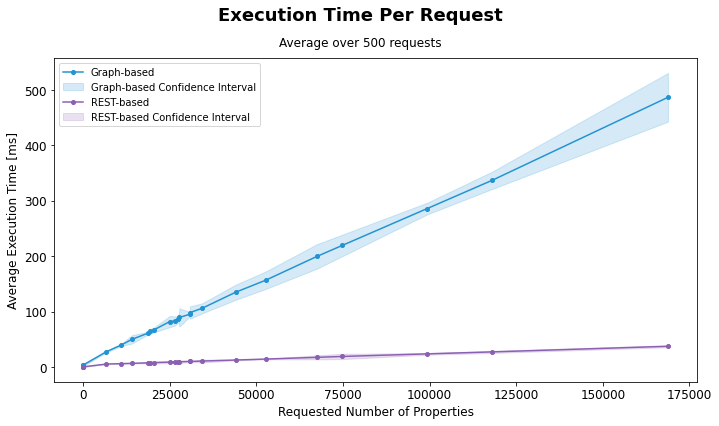

In [13]:
markersize = 8
titlesize = 18
fontsize = 12
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(sorted.PropertiesCount[:-1], sorted.GraphMean[:-1] * 1e3, '.-', color='#2393d2', label='Graph-based', markersize=markersize)
ax.fill_between(sorted.PropertiesCount[:-1], sorted.GraphLowerConfidence[:-1] * 1e3, sorted.GraphUpperConfidence[:-1] * 1e3, color='#2393d230', label='Graph-based Confidence Interval')
ax.plot(sorted.PropertiesCount[:-1], sorted.RESTMean[:-1] * 1e3, '.-', color='#8B60B3', label='REST-based', markersize=markersize)
ax.fill_between(sorted.PropertiesCount[:-1], sorted.RESTLowerConfidence[:-1] * 1e3, sorted.RESTUpperConfidence[:-1] * 1e3, color='#8B60B330', label='REST-based Confidence Interval')
plt.text(x=0.5, y=0.94, s="Execution Time Per Request", fontsize=titlesize, fontweight='bold', ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.88, s= "Average over 500 requests", fontsize=fontsize, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.85, wspace=1)
ax.set_ylabel('Average Execution Time [ms]', fontsize=fontsize)
ax.set_xlabel('Requested Number of Properties', fontsize=fontsize)
ax.legend()
fig.tight_layout()
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = fontsize)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = fontsize)
fig.savefig(plot_folder + 'mean_exec_time.png', facecolor='white', dpi=300, bbox_inches='tight')

/var/folders/0y/pyxlsldd7rj26sp56lk5ncxm0000gn/T/ipykernel_10919/2721474562.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = fontsize)
/var/folders/0y/pyxlsldd7rj26sp56lk5ncxm0000gn/T/ipykernel_10919/2721474562.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = fontsize)


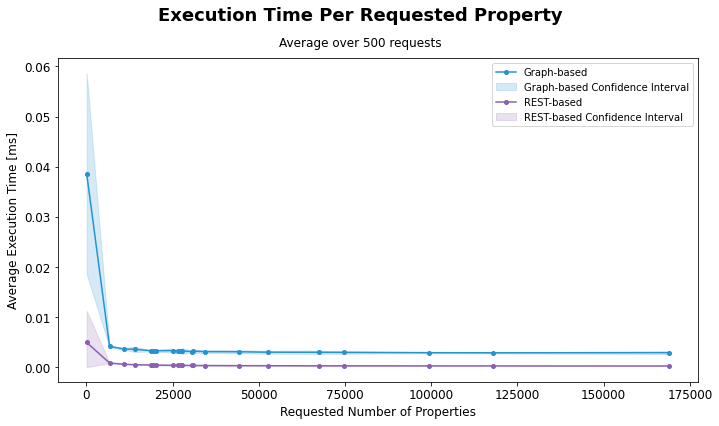

In [14]:
markersize = 8
titlesize = 18
fontsize = 12

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(sorted.PropertiesCount[2:-1], sorted.GraphTimePerProperty[2:-1] * 1e3, '.-', color='#2393d2', label='Graph-based', markersize=markersize)
ax.fill_between(sorted.PropertiesCount[2:-1], sorted.GraphPerPropertyLowerConfidence[2:-1] * 1e3, sorted.GraphPerPropertyUpperConfidence[2:-1] * 1e3, color='#2393d230', label='Graph-based Confidence Interval')
ax.plot(sorted.PropertiesCount[2:-1], sorted.RestTimePerProperty[2:-1] * 1e3, '.-', color='#8B60B3', label='REST-based', markersize=markersize)
ax.fill_between(sorted.PropertiesCount[2:-1], sorted.RESTPerPropertyLowerConfidence[2:-1] * 1e3, sorted.RESTPerPropertyUpperConfidence[2:-1] * 1e3, color='#8B60B330', label='REST-based Confidence Interval')

plt.text(x=0.5, y=0.94, s="Execution Time Per Requested Property", fontsize=titlesize, fontweight='bold', ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.88, s= "Average over 500 requests", fontsize=fontsize, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.85, wspace=1)
ax.set_ylabel('Average Execution Time [ms]', fontsize=fontsize)
ax.set_xlabel('Requested Number of Properties', fontsize=fontsize)
ax.legend()
fig.tight_layout()
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = fontsize)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = fontsize)
fig.savefig(plot_folder + 'mean_exec_time_per_property.png', facecolor='white', dpi=300, bbox_inches='tight')

/var/folders/0y/pyxlsldd7rj26sp56lk5ncxm0000gn/T/ipykernel_10919/1147856347.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = fontsize)
/var/folders/0y/pyxlsldd7rj26sp56lk5ncxm0000gn/T/ipykernel_10919/1147856347.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = fontsize)


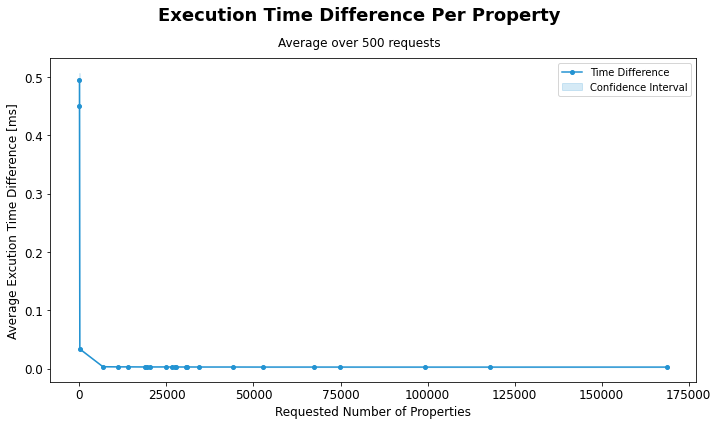

In [15]:
markersize = 8
titlesize = 18
fontsize = 12
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(sorted.PropertiesCount[:-1], sorted.DiffMean[:-1] * 1e3, '.-', color='#2393d2', label='Time Difference', markersize=markersize)
ax.fill_between(sorted.PropertiesCount[:-1], sorted.DiffLowerConfidence[:-1] * 1e3, sorted.DiffUpperConfidence[:-1] * 1e3, color='#2393d230', label='Confidence Interval')
plt.text(x=0.5, y=0.94, s="Execution Time Difference Per Property", fontsize=titlesize, fontweight='bold', ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.88, s= "Average over 500 requests", fontsize=fontsize, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.85, wspace=1)
ax.set_ylabel('Average Excution Time Difference [ms]', fontsize=fontsize)
ax.set_xlabel('Requested Number of Properties', fontsize=fontsize)
ax.legend()
fig.tight_layout()
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = fontsize)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = fontsize)
fig.savefig(plot_folder + 'mean_time_difference.png', facecolor='white', dpi=300, bbox_inches='tight')

In [16]:
survey = pd.read_csv(measurements_folder + 'qualitative_results.csv')

/var/folders/0y/pyxlsldd7rj26sp56lk5ncxm0000gn/T/ipykernel_10919/2168392167.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = fontsize)


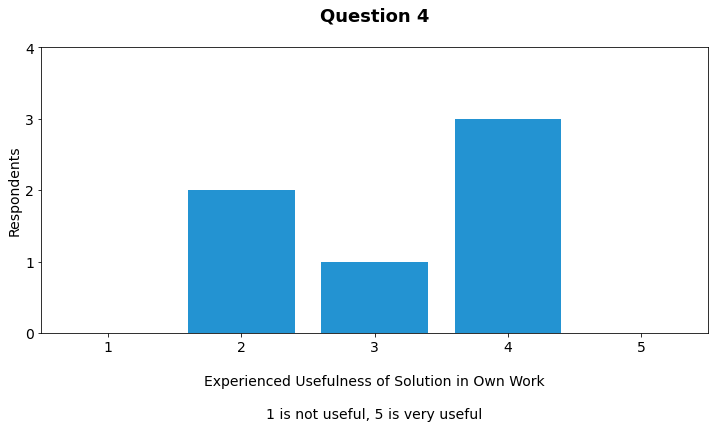

In [17]:
# Q4 Analysis
titlesize = 18
fontsize = 14

fig, ax = plt.subplots(figsize=(10, 6))
counts = survey.groupby('UsefulInOwnWork').UsefulInOwnWork.count()

ax.bar(counts.index, counts, color="#2393d2")
ax.set_title('Question 4\n', fontsize=titlesize, fontweight='bold')
ax.set_xlabel('\nExperienced Usefulness of Solution in Own Work\n\n1 is not useful, 5 is very useful', fontsize=fontsize)
ax.set_ylabel('Respondents', fontsize=fontsize)
ax.set_xlim(0.5, 5.5)
ax.set_yticks(range(5))

plt.tight_layout()
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = fontsize)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = fontsize)
plt.savefig(plot_folder + 'Q4Results.png', facecolor='white', dpi=300, bbox_inches='tight')

In [18]:
# Computes the Common Language Effect Size as formulated by Vargha and Delaney, 2000.

pingouin.mwu(data.GraphTimePerProperty, data.RestTimePerProperty)

,U-val,alternative,p-val,RBC,CLES
MWU,512.0,two-sided,0.000004,-0.777778,0.888889
